# Explore here

In [1]:
import pandas as pd
import numpy as np, random
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import os
import dotenv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
random.seed(42)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
#Dado que nos sale la importacion keras en cursiva nos aseguramos de que funcione con este pequeño test.
model = Sequential([
    Input(shape=(3,)), # Define la forma de entrada aquí
    Dense(2, activation='relu'),
    Dense(1)
])

print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11 (44.00 B)

 Trainable params: 11 (44.00 B)

 Non-trainable params: 0 (0.00 B)

None


9 imágenes aleatorias de gatos:


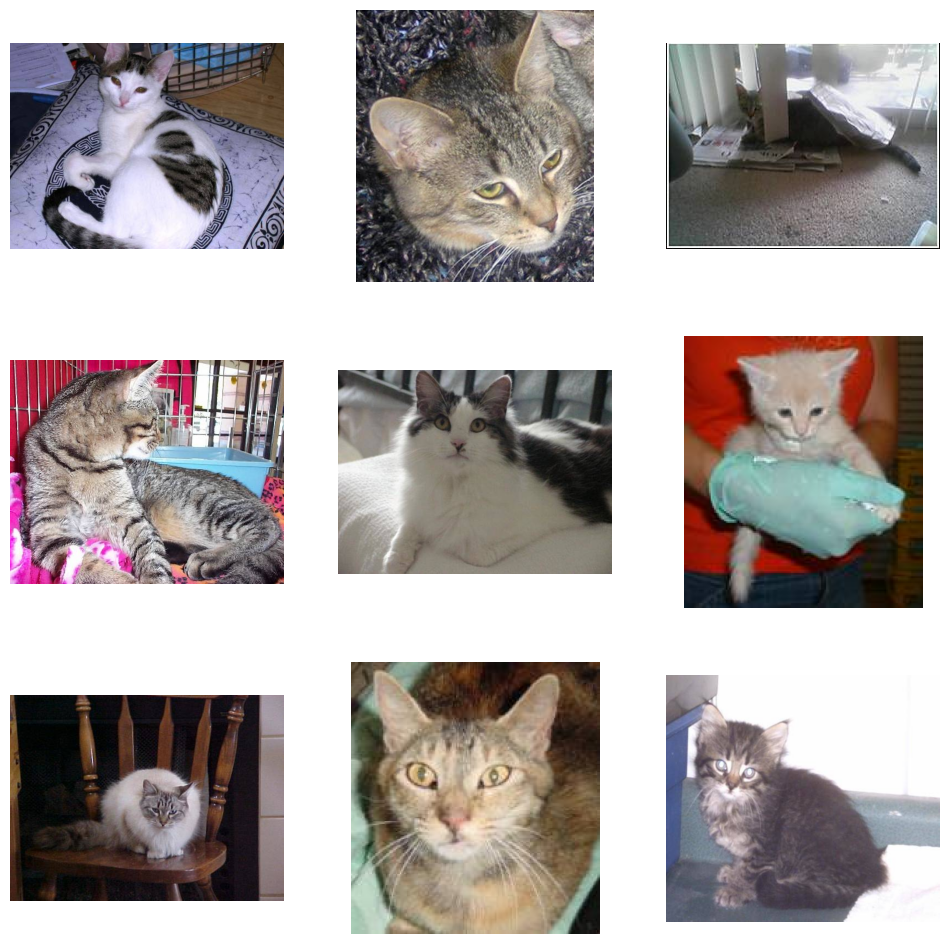

9 imágenes aleatorias de perros:


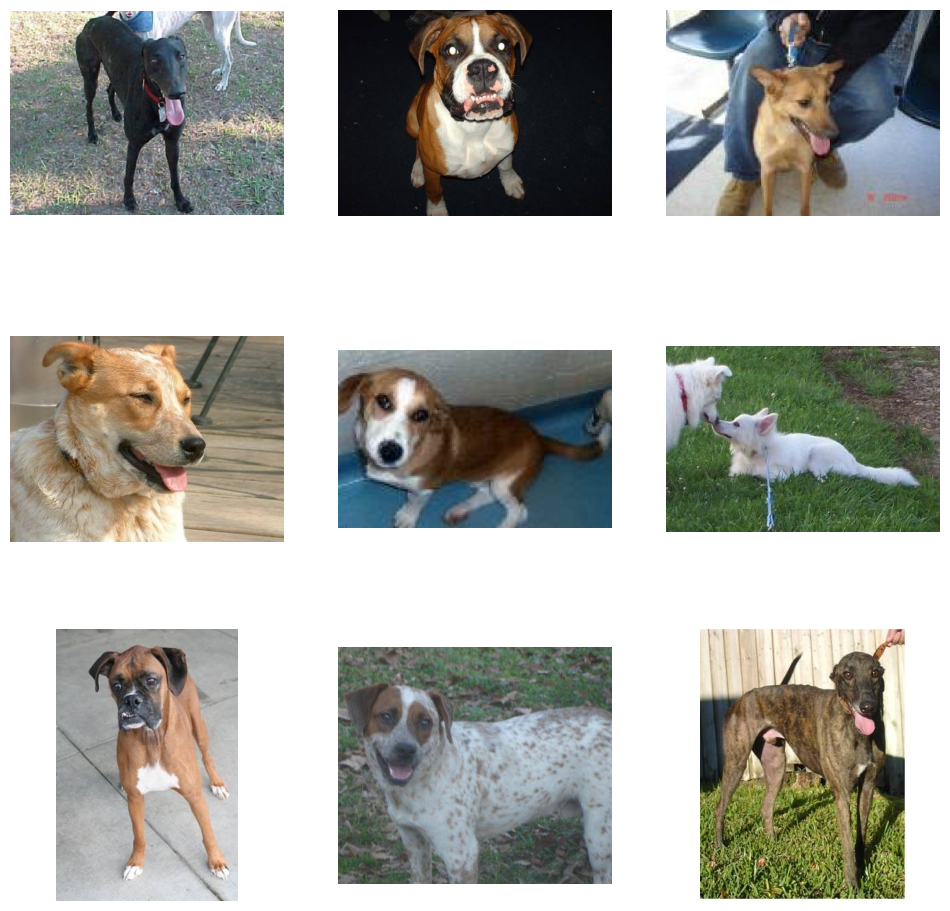

In [11]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
random.seed(42)


path = "C:/Users/Josue/4GA.DataScience/pictures/train"


# Creamos una lista vacia para almacenar las imagenes , 9 random pictures de cada tipo de la carpeta train.
gatos = []
perros = []

for filename in os.listdir(path):
    if filename.startswith("cat"):
        gatos.append(os.path.join(path, filename))
    elif filename.startswith("dog"):
        perros.append(os.path.join(path, filename))


gatos_random = random.sample(gatos, 9)


print("9 imágenes aleatorias de gatos:")
plt.figure(figsize=(12, 12))
for i, img_path in enumerate(gatos_random):
    plt.subplot(3, 3, i + 1)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
plt.show()


perros_random = random.sample(perros, 9)


print("9 imágenes aleatorias de perros:")
plt.figure(figsize=(12, 12))
for i, img_path in enumerate(perros_random):
    plt.subplot(3, 3, i + 1)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [12]:

#from keras.preprocessing.image import ImageDataGenerator
#Para que funcione esta modulo de la libreria necesitamos instalar 2 dependencias:
#pip install numpy, pip install Pillow
#En la llamada a la libreria y su modulo es para otra version de python diferente a 3.10.
#En nuestro caso utilizaremos este:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Definimos el train/test y varios parametros. Al ser un preprocesado, escogemos la conversion de pixeles y dimensiones de las imagenes.
#Nos aseguramos que la carpeta pesada esta ignorada a la hora de commitear a github, donde se aloja las imagenes y el resultado del modelo.
#Escojo dimensiones 100x100 por temas de tiempo de proceso
train_dir = "C:/Users/Josue/4GA.DataScience/pictures/train"
test_dir = "C:/Users/Josue/4GA.DataScience/pictures/test"
image_size = (100, 100)

trainpre = ImageDataGenerator()
testpre = ImageDataGenerator()

# Pasamos la feature a cada bloque de datos del split train/test
train = trainpre.flow_from_directory(
    train_dir,
    target_size=image_size,
    classes=["dog", "cat"]
)

# Test Data Generation
test = testpre.flow_from_directory(
    test_dir, # Corrected path
    target_size=image_size,
    classes=["dog", "cat"] # Corrected classes
)
print(train_dir,'\n',test_dir)

Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.
C:/Users/Josue/4GA.DataScience/pictures/train 
 C:/Users/Josue/4GA.DataScience/pictures/test


No me detecta las imagenes, dado que la funcion flow_from_directory espera subdirectorios que separen las imagenes de cats y dogs.
Es la practica standard cuando se usa la feature ImageDataGenerator.
Tambien influye la tipologia de los nombres, el punto entre la clase de imagen y la enumeracion hace que no funcione bien la funcion.
Utilizaremos otro metodo a  traves de un dataframe de etiquetado.
Gracias a la etiquetacion de las imagenes de train tendremos una classificacion categorica de las imagenes en el preprocesado
que nos servira de base para "enseñar a la red neuronal" una aprendizaje de reconocimiento de imagenes.
si nos fijamos en el csv de test_labels o sample submission , la id coincide con el numero de imagen  que a su vez es el numero de la imagen,
ademas la segunda columna 'label' al tener todas las imagenes 0, nos indica que todas las imagenes tienen la misma clase,
diferente a la de la carpeta train. Ese label es la categoria que la red neuronal tendra que predecir.

In [ ]:
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def rename_files(directory):
    for filename in os.listdir(directory):
        if filename.startswith("cat.") or filename.startswith("dog."):
            new_filename = filename.replace(".", "")
            old_filepath = os.path.join(directory, filename)
            new_filepath = os.path.join(directory, new_filename)
            os.rename(old_filepath, new_filepath)

def create_dataframe_train(directory):
    filepaths = []
    labels = []
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        if filename.startswith("cat"):
            label = "cat"
        elif filename.startswith("dog"):
            label = "dog"
        else:
            continue  # Skip files that don't match cat or dog
        filepaths.append(filepath)
        labels.append(label)
    return pd.DataFrame({"filepaths": filepaths, "labels": labels})

def create_dataframe_test_for_predictions(directory, csv_filename):
    labels_df = pd.read_csv(os.path.join(directory, csv_filename))
    labels_df["filepaths"] = labels_df["id"].apply(lambda id: os.path.join(directory, f"{id}.jpg")) # Construye la ruta completa
    return labels_df

train_dir = "C:/Users/Josue/4GA.DataScience/pictures/train"
test_dir = "C:/Users/Josue/4GA.DataScience/pictures/test"
image_size = (100, 100)

rename_files(train_dir)

train_df = create_dataframe_train(train_dir)
test_df = create_dataframe_test_for_predictions(test_dir, "test_labels.csv")

datagen = ImageDataGenerator()

train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col="filepaths",
    y_col="labels",
    target_size=image_size,
    class_mode="categorical",
    batch_size=32
)



Found 25000 validated image filenames belonging to 2 classes.


In [ ]:
#Entrenamos el modelo, visto los numeros de imagen la proporcion de train test es 2/3 y 1/3 respectivamente.


In [10]:
#from keras.preprocessing.image import ImageDataGenerator
#Para que funcione esta modulo de la libreria necesitamos instalar 2 dependencias:
#pip install numpy, pip install Pillow
#En la llamada a la libreria y su modulo es para otra version de python diferente a 3.10.
#En nuestro caso utilizaremos este:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
#Definimos el train/test y varios parametros. Al ser un preprocesado, escogemos la conversion de pixeles y dimensiones de las imagenes.
#Nos aseguramos que la carpeta pesada esta ignorada a la hora de commitear a github, donde se aloja las imagenes y el resultado del modelo.
#Escojo dimensiones 100x100 por temas de tiempo de proceso
train_dir = "C:/Users/Josue/4GA.DataScience/pictures/train"
test_dir = "C:/Users/Josue/4GA.DataScience/pictures/test"
image_size = (200, 200)

trainpre = ImageDataGenerator()
testpre = ImageDataGenerator()

# Pasamos la feature a cada bloque de datos del split train/test
train = trainpre.flow_from_directory(
    train_dir,
    target_size=image_size,
    classes=["dog", "cat"]
)

# Test Data Generation
test = testpre.flow_from_directory(
    test_dir, # Corrected path
    target_size=image_size,
    classes=["dog", "cat"] # Corrected classes
)

Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.
